# Model training and validation
- We split the data into training ans testing
- train two models: Gaussian mixture model and KMeans on derived vs original biomarkers
- validate them on the test data held out
- we use confusion matrix as the validation matrix
- we make a decision on which model to move forward with

In [24]:
import imblearn # when you encounter problem loading, install with pip3 and run in a new notebook

from imblearn.over_sampling import SMOTE, RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix,accuracy_score

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from joblib import dump, load

import seaborn as sns

In [2]:
baseline_df = pd.read_csv('./baseline_data_with_event_and_trans_time_imputed_time.csv')

In [100]:
baseline_df.columns

Index(['RID', 'VISCODE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV',
       'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3',
       'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP',
       'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP',
       'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK',
       'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP',
       'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS',
       'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND', 'PTMARRY',
       'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC', 'PTCOGBEG',
       'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'RUNDATE',
       'ABETA142', 'PTAU181P', 'TAU', 'ADAS11', 'TOTALMOD', 'APOE4', 'APGEN2',
       'MMSE_bl', 'rtaubeta', 'rptaubeta', 'ABETA_scaled', 'TAU_scaled',
       'PTAU_s

In [6]:
baseline_df2 = baseline_df[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event']]

In [7]:
baseline_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PTHOME           129 non-null    float64
 1   PTETHCAT         129 non-null    float64
 2   PTRACCAT         129 non-null    float64
 3   MMSE_bl          129 non-null    float64
 4   rtaubeta         129 non-null    float64
 5   rptaubeta        129 non-null    float64
 6   TOTAL11_scaled   129 non-null    float64
 7   TOTALMOD_scaled  129 non-null    float64
 8   APGEN1_scaled    129 non-null    float64
 9   MMSCORE_scaled   129 non-null    float64
 10  AGE              129 non-null    float64
 11  Event            129 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 12.2 KB


In [4]:
def get_over_under_resample_data(X,Y,under_s, over_s):
    
    over = SMOTE(sampling_strategy = over_s)
    
    under = RandomUnderSampler(sampling_strategy=under_s)
    
    steps = [('o', over), ('u', under)]
    
    pipeline = Pipeline(steps=steps)
    
    x, y = pipeline.fit_resample(X,Y)
    
    return x, y

In [8]:
target = ['Event']

## Rationale for splitting before over/under sampling
- we split first and only over and under sample the training data
- we won't touch the test data because we really want to see how well the model performs against reality

In [9]:
X = baseline_df2.drop(target, axis=1)

Y = baseline_df2[target]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
under_s_use = np.linspace(0.5,0.9,10).tolist()

for u in under_s_use:
    
    print('we are under sampling by', format(u,'%'))
    
    x_balanced, y_balanced = get_over_under_resample_data(x_train,y_train,under_s=u,over_s=0.4)

    logmodel = LogisticRegression()

    logmodel.fit( x_balanced,  y_balanced)
 
    predictions = logmodel.predict(x_test)

    print(classification_report(y_test, predictions))

    print(confusion_matrix(y_test, predictions))

    print(accuracy_score(y_test, predictions))

we are under sampling by 50.000000%
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.87      0.95      0.91        21

    accuracy                           0.85        26
   macro avg       0.77      0.68      0.70        26
weighted avg       0.83      0.85      0.83        26

[[ 2  3]
 [ 1 20]]
0.8461538461538461
we are under sampling by 54.444444%
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.86      0.86      0.86        21

    accuracy                           0.77        26
   macro avg       0.63      0.63      0.63        26
weighted avg       0.77      0.77      0.77        26

[[ 2  3]
 [ 3 18]]
0.7692307692307693
we are under sampling by 58.888889%
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.87      0.95      0.91        21

- From the runs above we will undersampe at 58% and over sample at 40%

- rationale is that that balance modification improved the model classification performance

## Revised model outperforms the one with imbalanced training data

- the fscore, precision and recall all improved across the prediction of the mionority class
- accuracy dropped but it is not very important in this context
- the weighted metrics are all fairly balanced in this case

In [12]:
X_balanced, Y_balanced = get_over_under_resample_data(x_train,y_train,under_s=0.58,over_s=0.4)

In [40]:
logmodel = LogisticRegression()

logmodel.fit(X_balanced, Y_balanced)
 
predictions = logmodel.predict(x_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.86      0.86      0.86        21

    accuracy                           0.77        26
   macro avg       0.63      0.63      0.63        26
weighted avg       0.77      0.77      0.77        26

[[ 2  3]
 [ 3 18]]
0.7692307692307693


# So what?
- Well the model can use the information on patients at baseline to correcly classify what they will become in the future.
- Specifically,the model can determine 86% of the time correctly if someone will transition in the future.

# Let see what random forest classifier makes of this

- first we train on the imbalanced data

- second we train on the balanced data

- we then test both on the imbalanced test

- the logistic regression is still better

In [43]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
 
predictions = rf.predict(x_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.83      0.95      0.89        21

    accuracy                           0.81        26
   macro avg       0.67      0.58      0.59        26
weighted avg       0.77      0.81      0.77        26

[[ 1  4]
 [ 1 20]]
0.8076923076923077


In [42]:
rf = RandomForestClassifier()

rf.fit(X_balanced, Y_balanced)
 
predictions = rf.predict(x_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.25      0.40      0.31         5
           1       0.83      0.71      0.77        21

    accuracy                           0.65        26
   macro avg       0.54      0.56      0.54        26
weighted avg       0.72      0.65      0.68        26

[[ 2  3]
 [ 6 15]]
0.6538461538461539


# Next: we will fit a clustering algorithm 

- The purpose is to get classes in an unsupervised manner
- The compare the unsupervsied classes with the Event using confusion matrix

## Recall these functions from Baseline_Analyses-ONE notebook

- when all is done, we will package these functions so we don't duplicate them in different notebooks
- here we use all the data to train the clustering algorithms
- then we compare with event (the ground truth) using confursion matrix

In [57]:
def relabel_clusters(df,cluster_type = 'km_clusters'):
    
    collect = []
    
    list_size = df[cluster_type].shape[0]
    
    list_use = df[cluster_type].tolist()
    
    for i in range(list_size):
        
        if list_use[i] == 3:
            
            collect.append(4)
            
        elif list_use[i] ==2:
            
            collect.append(3)
            
        elif list_use[i] == 1:
            
            collect.append(2)
            
        else:
            
            collect.append(1)
            
    df_use = df
    
    df_use[cluster_type] = collect
    
    df_use[cluster_type] = df_use[cluster_type].astype('category')
    
    return df_use


def cluster_models_v1(df_use_features, comps, state_use):
    
    df = df_use_features
    
    df_num = np.array(df)
    
    gm = GaussianMixture(n_components = comps, random_state = state_use).fit(df_num)
    
    gm_clusters = gm.predict(df_num)
    
    km = KMeans(n_clusters = comps, random_state = state_use).fit(df_num)
    
    df['km_clusters'] = km.labels_
    
    df['gm_clusters'] = gm_clusters
    
    df[['km_clusters','gm_clusters']] = df[['km_clusters','gm_clusters']].astype('category')
    
    dump(gm, 'gm_cluster_model_v1.joblib')
    
    dump(km, 'km_clusters_model_v1.joblib')
        
    return df


def cluster_models_v2(df_use_features, comps, state_use):
    
    df = df_use_features
    
    df_num = np.array(df)
    
    gm = GaussianMixture(n_components = comps, random_state = state_use).fit(df_num)
    
    gm_clusters = gm.predict(df_num)
    
    km = KMeans(n_clusters = comps, random_state = state_use).fit(df_num)
    
    df['km_clusters'] = km.labels_
    
    df['gm_clusters'] = gm_clusters
    
    df[['km_clusters','gm_clusters']] = df[['km_clusters','gm_clusters']].astype('category')
    
    dump(gm, 'gm_cluster_model_v2.joblib')
    
    dump(km, 'km_clusters_model_v2.joblib')
   
    return df


def cluster_models_v3(df_use_features, comps, state_use):
    
    df = df_use_features
    
    df_num = np.array(df)
    
    gm = GaussianMixture(n_components = comps, random_state = state_use).fit(df_num)
    
    gm_clusters = gm.predict(df_num)
    
    km = KMeans(n_clusters = comps, random_state = state_use).fit(df_num)
    
    df['km_clusters'] = km.labels_
    
    df['gm_clusters'] = gm_clusters
    
    df[['km_clusters','gm_clusters']] = df[['km_clusters','gm_clusters']].astype('category')
    
    dump(gm, 'gm_cluster_model_v3.joblib')
    
    dump(km, 'km_clusters_model_v3.joblib')
   
    return df

In [13]:
baseline_df2.columns

Index(['PTHOME', 'PTETHCAT', 'PTRACCAT', 'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled', 'MMSCORE_scaled',
       'AGE', 'Event'],
      dtype='object')

In [14]:
num_feature = ['PTHOME', 'PTETHCAT', 'PTRACCAT', 'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled', 'MMSCORE_scaled',
       'AGE']

out = cluster_models_v1(x_train, comps=2, state_use=54)

In [15]:
out.columns

Index(['PTHOME', 'PTETHCAT', 'PTRACCAT', 'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled', 'MMSCORE_scaled',
       'AGE', 'km_clusters', 'gm_clusters'],
      dtype='object')

In [75]:
out.head()

,PTHOME,PTETHCAT,PTRACCAT,MMSE_bl,rtaubeta,rptaubeta,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,MMSCORE_scaled,AGE,km_clusters,gm_clusters
80,1.0,2.0,5.0,26.0,0.130624,0.010369,0.689,0.304,0.064,0.209,96.0,0,0
44,1.0,2.0,5.0,25.0,0.426741,0.040692,1.623,1.686,0.064,0.001,96.0,0,0
99,1.0,2.0,5.0,24.0,0.337348,0.024681,3.144,2.963,0.064,-0.208,93.0,0,0
54,1.0,2.0,5.0,30.0,0.509381,0.054597,1.476,1.375,0.064,1.044,94.0,0,0
83,1.0,2.0,5.0,25.0,0.135618,0.011178,0.445,0.546,0.064,0.001,87.0,1,0


# Visualize clustering w.r.t the engineered biomarkers
- We notice that the engineered bomarkers are linear and not separating well.

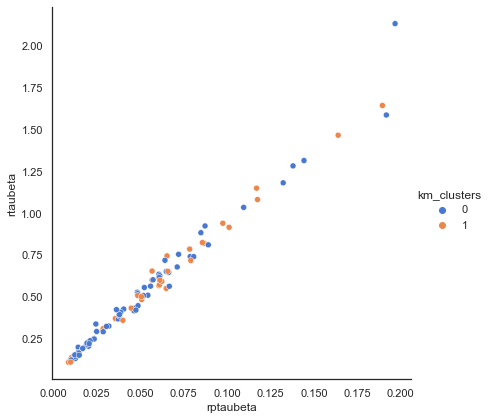

In [99]:
sns.set_theme(style="white")

sns.relplot(x="rptaubeta", y="rtaubeta", hue="km_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out)

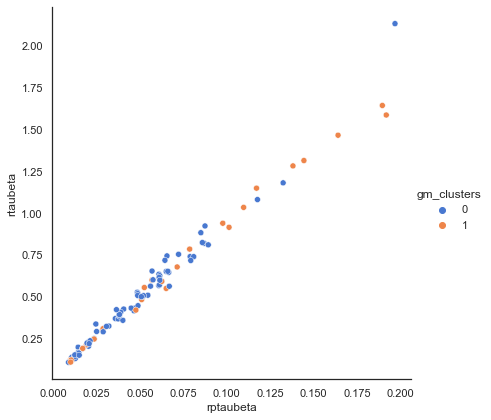

In [98]:
sns.set_theme(style="white")

sns.relplot(x="rptaubeta", y="rtaubeta", hue="gm_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out)

# Compare model performance with Ground truth (Event)

- From the analyses below, Kmeans is slightly outperforming the agussian mixture model across all metrics
- notice that here we used the imbalanced data

# KMeans predictions and model validation

- here we load the saved model and score it on an out of sample data

- the metrics of interest are recall, precision and fscore

- it is apparent the model is performing averagely across all metrics


In [79]:
km = load('km_clusters_model_v1.joblib')

km_pred = km.predict(x_test)

In [80]:
print(classification_report(y_test, km_pred))

print(confusion_matrix(y_test, km_pred))

print(accuracy_score(y_test, km_pred))

              precision    recall  f1-score   support

           0       0.19      0.60      0.29         5
           1       0.80      0.38      0.52        21

    accuracy                           0.42        26
   macro avg       0.49      0.49      0.40        26
weighted avg       0.68      0.42      0.47        26

[[ 3  2]
 [13  8]]
0.4230769230769231


## Gaussiam mixture model predictions and model validation

- it is apparent the model is performing averagely across 

In [ ]:
gm = load('gm_cluster_model_v1.joblib')

gm_pred = gm.predict(x_test)

In [78]:
print(classification_report(y_test, gm_pred))

print(confusion_matrix(y_test, gm_pred))

print(accuracy_score(y_test, gm_pred))

              precision    recall  f1-score   support

           0       0.21      0.80      0.33         5
           1       0.86      0.29      0.43        21

    accuracy                           0.38        26
   macro avg       0.53      0.54      0.38        26
weighted avg       0.73      0.38      0.41        26

[[ 4  1]
 [15  6]]
0.38461538461538464


# Trying with the biomarkers prior to engineering
- this means using abeta and ptau or tau to check the separation

In [16]:
baseline_df3 = baseline_df[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'ABETA142', 'PTAU181P', 'TAU',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event']]

In [33]:
X1 = baseline_df3.drop(target, axis=1)

Y1 = baseline_df2[target]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=1)

In [34]:
len(x_train1.columns)

12

In [56]:
out2 = cluster_models_v2(x_train1, comps=2, state_use=54)

In [21]:
out2.head()

,PTHOME,PTETHCAT,PTRACCAT,MMSE_bl,ABETA142,PTAU181P,TAU,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,MMSCORE_scaled,AGE,km_clusters,gm_clusters
80,1.0,2.0,5.0,26.0,2387.0,24.75,311.8,0.689,0.304,0.064,0.209,96.0,1,1
44,1.0,2.0,5.0,25.0,756.9,30.80,323.0,1.623,1.686,0.064,0.001,96.0,0,0
99,1.0,2.0,5.0,24.0,689.2,17.01,232.5,3.144,2.963,0.064,-0.208,93.0,0,0
54,1.0,2.0,5.0,30.0,751.5,41.03,382.8,1.476,1.375,0.064,1.044,94.0,0,0
83,1.0,2.0,5.0,25.0,1036.0,11.58,140.5,0.445,0.546,0.064,0.001,87.0,0,0


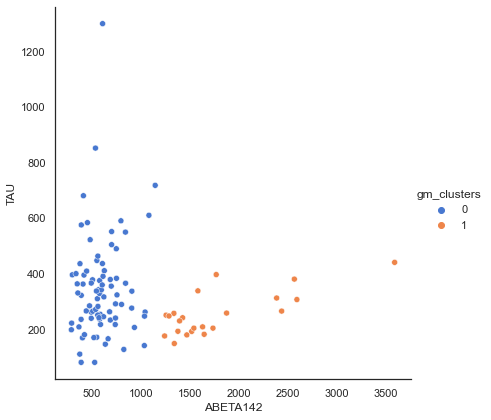

In [25]:
sns.set_theme(style="white")

sns.relplot(x="ABETA142", y="TAU", hue="gm_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out2)

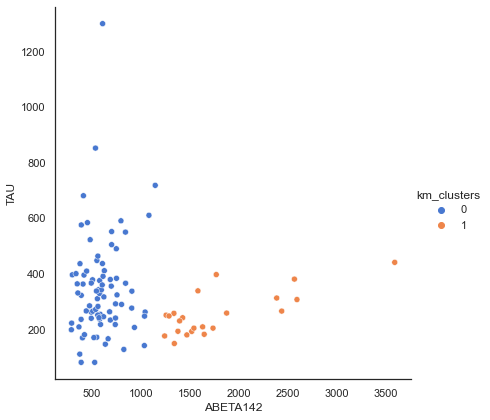

In [27]:
sns.set_theme(style="white")

sns.relplot(x="ABETA142", y="TAU", hue="km_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out2)

## Checking with KM 
- the model has high recal for non events and high precision for events. 
- Could be due to the high imbalance influencing the classification
- we will use a balanced data to confirm

In [39]:
km2 = load('km_clusters_model_v2.joblib')

km_pred2 = km2.predict(x_test1)

In [40]:
print(classification_report(y_test1, km_pred2))

print(confusion_matrix(y_test1, km_pred2))

print(accuracy_score(y_test1, km_pred2))

              precision    recall  f1-score   support

           0       0.19      0.80      0.31         5
           1       0.80      0.19      0.31        21

    accuracy                           0.31        26
   macro avg       0.50      0.50      0.31        26
weighted avg       0.68      0.31      0.31        26

[[ 4  1]
 [17  4]]
0.3076923076923077


## Checking from a GM standpoint
- the model is doing poorly in identifying non-events and excellently identifying events

In [36]:
gm2 = load('gm_cluster_model_v2.joblib')

gm_pred2 = gm2.predict(x_test1)

In [37]:
print(classification_report(y_test1, gm_pred2))

print(confusion_matrix(y_test1, gm_pred2))

print(accuracy_score(y_test1, gm_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.81      1.00      0.89        21

    accuracy                           0.81        26
   macro avg       0.40      0.50      0.45        26
weighted avg       0.65      0.81      0.72        26

[[ 0  5]
 [ 0 21]]
0.8076923076923077


In [44]:
x_train1 = x_train1.drop(columns=['km_clusters', 'gm_clusters'])

## How does it look with a random forest model
- here the weighted fscore is better than the GM and KM models

In [47]:
rf2 = RandomForestClassifier()

rf2.fit(x_train1, y_train1)
 
predictions2 = rf2.predict(x_test1)

print(classification_report(y_test1, predictions2))

print(confusion_matrix(y_test1, predictions2))

print(accuracy_score(y_test1, predictions2))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.83      0.90      0.86        21

    accuracy                           0.77        26
   macro avg       0.58      0.55      0.56        26
weighted avg       0.73      0.77      0.75        26

[[ 1  4]
 [ 2 19]]
0.7692307692307693


# Fit all three models to the balanced data
- First we fit and test for the random forest which performed worse on the validation test set compared to the imbalanced data fit.
- Second we fit the KM model which also worse compared to the one fitted to the imbalanced data.
- Lastly we fit the GM model which beformed BETTER on the validation set compared to its version fitted on the imbalanced data.

In [49]:
X_balanced_1, Y_balanced_1 = get_over_under_resample_data(x_train1,y_train1,under_s=0.58,over_s=0.4)

## Ranfom forest
- here again we have a classification model that we train with labels and then use to predict future occurence of the event

In [53]:
rf3 = RandomForestClassifier()

rf3.fit(X_balanced_1, Y_balanced_1)
 
predictions3 = rf3.predict(x_test1)

print(classification_report(y_test1, predictions3))

print(confusion_matrix(y_test1, predictions3))

print(accuracy_score(y_test1, predictions3))

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.78      0.67      0.72        21

    accuracy                           0.58        26
   macro avg       0.45      0.43      0.44        26
weighted avg       0.65      0.58      0.61        26

[[ 1  4]
 [ 7 14]]
0.5769230769230769


In [61]:
X_balanced_1 = X_balanced_1.drop(columns=['km_clusters', 'gm_clusters'])

# Train clustering algorithms

- here we train the two clustering/unsupervised algorithms KM and GMM (GM) 
- tested them on out of sample data

In [62]:
out3 = cluster_models_v3(X_balanced_1, comps=2, state_use=54)

In [63]:
out3.head()

,PTHOME,PTETHCAT,PTRACCAT,MMSE_bl,ABETA142,PTAU181P,TAU,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,MMSCORE_scaled,AGE,km_clusters,gm_clusters
0,1.0,2.0,5.0,25.0,1036.0,11.58,140.5,0.445,0.546,0.064,0.001,87.0,0,1
1,1.0,2.0,5.0,26.0,476.4,29.31,283.6,1.131,1.029,0.064,0.209,104.0,0,1
2,1.0,2.0,5.0,29.0,390.9,8.00,80.0,-0.733,-0.800,0.064,0.835,93.0,0,1
3,1.0,2.0,5.0,26.0,509.7,24.87,264.4,2.212,1.996,0.064,0.209,96.0,0,1
4,1.0,2.0,5.0,28.0,1737.0,17.65,203.3,-0.832,-0.973,-2.415,0.626,87.0,1,1


In [64]:
km3 = load('km_clusters_model_v3.joblib')

km_pred3 = km3.predict(x_test1)

print(classification_report(y_test1, km_pred3))

print(confusion_matrix(y_test1, km_pred3))

print(accuracy_score(y_test1, km_pred3))

              precision    recall  f1-score   support

           0       0.19      0.80      0.31         5
           1       0.80      0.19      0.31        21

    accuracy                           0.31        26
   macro avg       0.50      0.50      0.31        26
weighted avg       0.68      0.31      0.31        26

[[ 4  1]
 [17  4]]
0.3076923076923077


In [65]:
gm3 = load('gm_cluster_model_v3.joblib')

gm_pred3 = gm3.predict(x_test1)

print(classification_report(y_test1, gm_pred3))

print(confusion_matrix(y_test1, gm_pred3))

print(accuracy_score(y_test1, gm_pred3))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.83      0.95      0.89        21

    accuracy                           0.81        26
   macro avg       0.67      0.58      0.59        26
weighted avg       0.77      0.81      0.77        26

[[ 1  4]
 [ 1 20]]
0.8076923076923077


# Visualize the clusters based on the balanced data

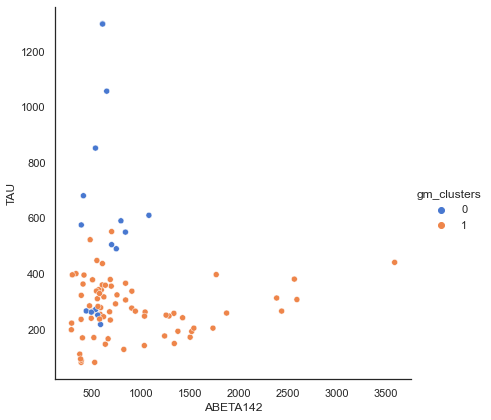

In [66]:
sns.set_theme(style="white")

sns.relplot(x="ABETA142", y="TAU", hue="gm_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out3)

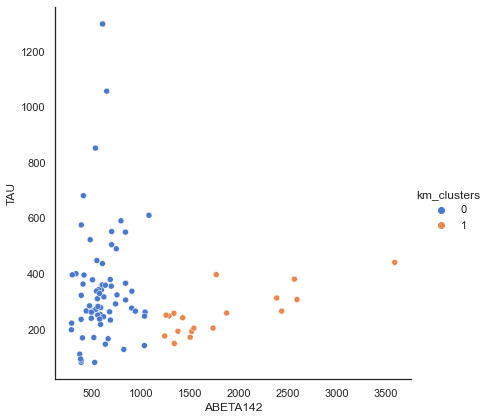

In [67]:
sns.set_theme(style="white")

sns.relplot(x="ABETA142", y="TAU", hue="km_clusters",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=out3)